# Pandas tips and tricks 01
Written by: Awais Haleem\
Date: 02/10/2023\
Email: awaishaleem20@gmail.com

# 01- How to find version

In [1]:
import pandas as pd
pd.__version__

'2.1.1'

In [2]:
pd.show_versions()

/Users/sami/miniconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit              : e86ed377639948c64c429059127bcf5b359ab6be
python              : 3.11.4.final.0
python-bits         : 64
OS                  : Darwin
OS-release          : 22.6.0
Version             : Darwin Kernel Version 22.6.0: Fri Sep 15 13:41:30 PDT 2023; root:xnu-8796.141.3.700.8~1/RELEASE_ARM64_T8103
machine             : arm64
processor           : arm
byteorder           : little
LC_ALL              : None
LANG                : None
LOCALE              : None.UTF-8

pandas              : 2.1.1
numpy               : 1.26.0
pytz                : 2023.3.post1
dateutil            : 2.8.2
setuptools          : 67.8.0
pip                 : 23.1.2
Cython              : None
pytest              : None
hypothesis          : None
sphinx              : None
blosc               : None
feather             : None
xlsxwriter          : None
lxml.etree          : None
html5lib            : None
pymysql             : None
psycopg2            : None
ji

# 02- Make a Data Frame

In [3]:
df = pd.DataFrame(data={"A col":[1, 2, 3, 4, 5, 6], "B col":[9,8,7,67,5,5]})
df

,A col,B col
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [4]:
# making DF using numpy
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [5]:
df = pd.DataFrame(arr)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [6]:
pd.DataFrame(np.random.rand(4, 8))

,0,1,2,3,4,5,6,7
0,0.779941,0.379293,0.089202,0.648355,0.655502,0.516239,0.641124,0.588752
1,0.939952,0.173931,0.438245,0.963198,0.842401,0.722651,0.034794,0.045615
2,0.030908,0.820250,0.858866,0.748619,0.926052,0.684473,0.653331,0.670064
3,0.688998,0.776580,0.296492,0.539241,0.236993,0.681278,0.272227,0.093451


In [7]:
pd.DataFrame(np.random.rand(4, 8), columns=list("abcdefgh"))

,a,b,c,d,e,f,g,h
0,0.555387,0.116538,0.824492,0.879290,0.572919,0.466167,0.678861,0.806196
1,0.102482,0.220679,0.287104,0.067158,0.013177,0.104303,0.074574,0.273475
2,0.782389,0.101437,0.887902,0.641897,0.870949,0.594952,0.928440,0.322396
3,0.964115,0.973639,0.457772,0.680216,0.376402,0.301073,0.505193,0.293613


# 03- Renaming column

In [8]:
df = pd.DataFrame(data={"A col":[1, 2, 3, 4, 5, 6], "B col":[9,8,7,67,5,5]})
df

,A col,B col
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [9]:
df.rename(columns={"A col": "A", "B col": "B"}, inplace=True)
df

,A,B
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [10]:
# rename column
df.columns = ["A-1", "B-1"]
df

,A-1,B-1
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [11]:
# to replace any character, string
df.columns = df.columns.str.replace("-1", "")
df

,A,B
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [12]:
# to replace any character, string
df.columns = df.columns.str.replace("", "1")
df

,1A1,1B1
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [13]:
# add prefix
df = df.add_prefix("baba", axis=1)
df

,baba1A1,baba1B1
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [14]:
# add prefix
df = df.add_prefix("Ali")
df

,Alibaba1A1,Alibaba1B1
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [15]:
# add suffix
df = df.add_suffix("baba", axis=1)
df

,Alibaba1A1baba,Alibaba1B1baba
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


In [16]:
df.columns = ["A", "B"]
df

,A,B
0,1,9
1,2,8
2,3,7
3,4,67
4,5,5
5,6,5


# 04- Using Template Data

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [18]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
# summary
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [20]:
# column name
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [21]:
# saving dataset
tips.to_csv("tips.csv")

In [22]:
tips.to_excel("tips.xlsx")

# 05- Using your own data

In [23]:
import pandas as pd
df = pd.read_csv("./tips.csv")
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### 06- Reverse Row Order

In [24]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.iloc[::-1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [26]:
# revers and reset index
df.loc[::-1].reset_index(drop=True).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
2,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
3,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
4,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [27]:
# revers and reset index
df.loc[::-1].reset_index(drop=False).head()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
2,888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
3,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
4,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


# 07- Reverse column

In [28]:
df.loc[:, ::-1].head()

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,False,no,Southampton,NaN,True,man,Third,S,7.2500,0,1,22.0,male,3,0
1,False,yes,Cherbourg,C,False,woman,First,C,71.2833,0,1,38.0,female,1,1
2,True,yes,Southampton,NaN,False,woman,Third,S,7.9250,0,0,26.0,female,3,1
3,False,yes,Southampton,C,False,woman,First,S,53.1000,0,1,35.0,female,1,1
4,True,no,Southampton,NaN,True,man,Third,S,8.0500,0,0,35.0,male,3,0


### 08-Select columns by dtype

In [29]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [30]:
# select only number's columns
df.select_dtypes(include=['number']).head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [31]:
# select only objects's columns
df.select_dtypes(include=['object']).head()

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no


In [32]:

df.select_dtypes(exclude=['number']).head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


# 09- Strings to numbers

In [33]:
data = [['1', '2'],
        ['3', '4'],
        ['5', '6'],
        ['7', '8'],
        ['9', '10'],
        ['11', '12'],
        ['13', '14'],
        ['15', '16'],
        ['17', '18'],
        ['19', '20']]

# Create a DataFrame
df = pd.DataFrame(data, columns=['Column 1', 'Column 2'])
df

,Column 1,Column 2
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12
6,13,14
7,15,16
8,17,18
9,19,20


In [34]:
df.dtypes

Column 1    object
Column 2    object
dtype: object

In [35]:
df.astype("int64").dtypes

Column 1    int64
Column 2    int64
dtype: object

In [38]:
pd.to_numeric(df["Column 1"], errors='coerce')

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
8    17
9    19
Name: Column 1, dtype: int64

# 10- Reduce DF size

In [40]:
df = sns.load_dataset("titanic")
df.shape

(891, 15)

In [43]:
# take randomize sample from big DF
df.sample(frac=0.1).shape       # frac range 0-1

(89, 15)

In [44]:
# to seee memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# 11- Copy Data from Clipboard

In [45]:
# I copied random from internet, now i'll load here
df = pd.read_clipboard()
df

,A,B,C,D,E,F
1,12,1,28,95,12,24
2,13,1,7,41,9,22
3,12,76,20,100,60,72
4,84,32,74,70,56,140
5,98,98,49,3,13,111
6,38,14,24,1,54,92
7,24,79,81,66,73,97
8,58,48,24,19,98,156
9,36,29,17,26,52,88


In [46]:
df.to_csv("random.csv")

# 12- Split DF into two subsets

In [49]:
df = sns.load_dataset("titanic")
df.shape

(891, 15)

In [50]:
from random import random
df_1 = df.sample(frac=0.5, random_state=1)    # take 50 percent random data
df_1.shape

(446, 15)

In [51]:
df_2 = df.drop(df_1.index)
df_2.shape

(445, 15)

In [52]:
df_1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False


In [53]:
df_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


# 13- Join two datasets

In [60]:
joined_df = pd.concat([df_1, df_2], ignore_index=False, axis=0)
joined_df.shape

(891, 15)

# 14- Filtering dataframe

In [63]:
df = joined_df.sort_index()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
df.sex.unique() # get unique values

array(['male', 'female'], dtype=object)

In [66]:
# get data frame of only femals
df[(df.sex == "female")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [67]:
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [68]:
df[df["class"] == "First"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [73]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [74]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [79]:
# get females that come from Southampton on deck
df[(df.sex == "female") & (df.embark_town == "Southampton")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [83]:
# get all males that come from Southampton or Cherbourg
df[(df.sex == "male") &
   ((df.embark_town == "Southampton")
     | (df.embark_town == "Cherbourg"))]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [81]:
df.shape

(891, 15)

In [86]:
# get using isin
df[df.embark_town.isin(["Cherbourg"])].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True


In [87]:
# get all males that come from Southampton or Cherbourg
df[(df.sex == "male") &
   df.embark_town.isin(["Cherbourg", "Southampton"])]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [102]:
# how many females above 30 are there in titanic
df[(df.sex == "female") & (df.age > 30)].shape[0]

103

# 15- Filtering by Large Categories

In [103]:
# get uniqu values and count
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [118]:
df.age.value_counts().nlargest(3).index


Index([24.0, 22.0, 18.0], dtype='float64', name='age')

In [108]:
# get top three old man
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 87.5+ KB


In [124]:
# get the data of larges who
df[df.who.isin(df.who.value_counts().nlargest(1).index)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Spliting String into multiple columns

In [138]:
df = pd.DataFrame({'name': ["Ali Raza", "Baqar Ali", "Abu Hurrear", "Usman Shareef"],
                   "place": ["Karachi, Pakista", "Lahore, Pakista", "Sawat, Pakista", "Sargodha, Pakista"]})
df

,name,place
0,Ali Raza,"Karachi, Pakista"
1,Baqar Ali,"Lahore, Pakista"
2,Abu Hurrear,"Sawat, Pakista"
3,Usman Shareef,"Sargodha, Pakista"


In [139]:
df.name.str.split(" ", expand=True)

,0,1
0,Ali,Raza
1,Baqar,Ali
2,Abu,Hurrear
3,Usman,Shareef


In [140]:
df[["first_name", "last_name"]] = df.name.str.split(" ", expand=True)
df

,name,place,first_name,last_name
0,Ali Raza,"Karachi, Pakista",Ali,Raza
1,Baqar Ali,"Lahore, Pakista",Baqar,Ali
2,Abu Hurrear,"Sawat, Pakista",Abu,Hurrear
3,Usman Shareef,"Sargodha, Pakista",Usman,Shareef


In [141]:
df[["city", "country"]] = df.place.str.split(", ", expand=True)

df

,name,place,first_name,last_name,city,country
0,Ali Raza,"Karachi, Pakista",Ali,Raza,Karachi,Pakista
1,Baqar Ali,"Lahore, Pakista",Baqar,Ali,Lahore,Pakista
2,Abu Hurrear,"Sawat, Pakista",Abu,Hurrear,Sawat,Pakista
3,Usman Shareef,"Sargodha, Pakista",Usman,Shareef,Sargodha,Pakista


In [142]:
# Refine data manipulation
df = df[["first_name", "last_name", "city", "country"]]
df

,first_name,last_name,city,country
0,Ali,Raza,Karachi,Pakista
1,Baqar,Ali,Lahore,Pakista
2,Abu,Hurrear,Sawat,Pakista
3,Usman,Shareef,Sargodha,Pakista


# 17- Aggregating Data Sets

In [18]:
import pandas as pd
import seaborn as sns

# load dataset
df = sns.load_dataset("titanic")
df.shape

(891, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
# group data
# get data of male, female and child
df.groupby("who").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [8]:
# get data of male and female
df.groupby("sex").count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [25]:

df.groupby("who").survived.sum()

who
child     49
man       88
woman    205
Name: survived, dtype: int64

In [26]:
# get the total fare by who
df.groupby("who").fare.sum()

who
child     2721.2210
man      13352.0656
woman    12620.6627
Name: fare, dtype: float64

In [27]:
# check number of categories in a column
len(df.groupby("fare"))

248

In [28]:
len(df.groupby("who"))

3

In [29]:
df.groupby(['sex', 'pclass', 'adult_male']).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass adult_male                                                       
female 1      False             94   85     94     94    94        92     94   
       2      False             76   74     76     76    76        76     76   
       3      False            144  102    144    144   144       144    144   
male   1      False              3    3      3      3     3         3      3   
              True             119   98    119    119   119       119    119   
       2      False              9    9      9      9     9         9      9   
              True              99   90     99     99    99        99     99   
       3      False             28   28     28     28    28        28     28   
              True             319  225    319    319   319       319    319   

                          who  deck  embark_town  alive  alone  
sex    pclass adult_male                                        
female 1      False        94    81           92     94     94  
       2      False        76    10           76     76     76  
       3      False       144     6          144    144    144  
male   1      False         3     3            3      3      3  
              True        119    91          119    119    119  
       2      False         9     3            9      9      9  
              True         99     3           99     99     99  
       3      False        28     1           28     28     28  
              True        319     5          319    319    319

# 18- Select Specific rows or columns

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
# select columns
df[["sex", "class"]]

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third
...,...,...
886,male,Second
887,female,First
888,female,Third
889,male,First


In [34]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# select specific rows
df.describe().loc[["min", "50%", "max"]]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.42,0.0,0.0,0.0000
50%,0.0,3.0,28.00,0.0,0.0,14.4542
max,1.0,3.0,80.00,8.0,6.0,512.3292


In [36]:
# alternate
df.describe().loc["min":"max"]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [38]:
# selecting columns and rows
df.describe().loc["min":"max",]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [40]:
df.describe().loc["min":"max", ["fare", "age"]]


,fare,age
min,0.0000,0.420
25%,7.9104,20.125
50%,14.4542,28.000
75%,31.0000,38.000
max,512.3292,80.000


# 19- Reshape Multi-Index Series

In [41]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
df.survived.mean()

0.3838383838383838

In [44]:
df.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [45]:
df.groupby(["sex", "class"]).survived.mean()

/var/folders/mw/q__st4hn467b2k0rcxqx03lh0000gn/T/ipykernel_3387/2367452024.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["sex", "class"]).survived.mean()


sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [50]:
df.groupby(["sex", "class"], observed=False).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [46]:
df.groupby(["who", "embark_town"]).fare.mean()

who    embark_town
child  Cherbourg      17.289594
       Queenstown     24.905840
       Southampton    38.091318
man    Cherbourg      50.023568
       Queenstown     12.186373
       Southampton    20.485485
woman  Cherbourg      87.649373
       Queenstown     12.766551
       Southampton    38.821098
Name: fare, dtype: float64

# 20- Change Continuous Variable into Categorical Variable

In [51]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
# creating bins
pd.cut(df.age, bins=[0, 18, 25, 99], labels=["young", "young_adult", "adult"])

0      young_adult
1            adult
2            adult
3            adult
4            adult
          ...     
886          adult
887    young_adult
888            NaN
889          adult
890          adult
Name: age, Length: 891, dtype: category
Categories (3, object): ['young' < 'young_adult' < 'adult']

In [53]:
df["new_age"] = pd.cut(df.age, bins=[0, 18, 25, 99], labels=["young", "young_adult", "adult"])

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


# 21- Convert one set of values into another one

In [56]:
# change male and female to 1 and 0
df.sex.map({"female": 0, "male": 1})

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int64

In [57]:
# add to df
df["sex_number"] = df.sex.map({"female": 0, "male": 1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_number
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,1


In [58]:
# convert through factorize
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [60]:
df.embarked.factorize()[0]

array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
        0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
        0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
        0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0

In [61]:
df['embarked_num'] = df.embarked.factorize()[0]

In [62]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_number,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,1,0


# 22- Transposing a wide Data Frame

In [64]:
# creating new df
import numpy as np
import pandas as pd


df = pd.DataFrame(np.random.rand(5, 25), columns=list("abcdefghijklmnopqrstuvwxy"))
df

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.332302,0.690128,0.773677,0.018364,0.739268,0.031607,0.124299,0.196571,0.234614,0.298368,...,0.254311,0.359228,0.089720,0.581334,0.553329,0.642151,0.118890,0.910847,0.441114,0.344424
1,0.641824,0.406662,0.563993,0.708439,0.822309,0.521995,0.907607,0.237177,0.165532,0.751936,...,0.968958,0.191962,0.916305,0.849418,0.413204,0.158456,0.857258,0.474845,0.582461,0.159404
2,0.414516,0.481951,0.869106,0.442240,0.015731,0.598362,0.471956,0.531314,0.379255,0.917721,...,0.257776,0.088463,0.093634,0.840798,0.686749,0.181746,0.361098,0.548093,0.970584,0.394022
3,0.582884,0.370710,0.670669,0.065687,0.972778,0.977242,0.986093,0.286281,0.798822,0.484530,...,0.740422,0.227177,0.147215,0.110420,0.769650,0.675378,0.419492,0.344696,0.696750,0.814152
4,0.644506,0.070867,0.329204,0.284324,0.196401,0.610440,0.292792,0.054191,0.879623,0.466353,...,0.458845,0.041987,0.030987,0.923231,0.181390,0.442240,0.296164,0.579912,0.554451,0.995643


In [65]:
df.T

,0,1,2,3,4
a,0.332302,0.641824,0.414516,0.582884,0.644506
b,0.690128,0.406662,0.481951,0.370710,0.070867
c,0.773677,0.563993,0.869106,0.670669,0.329204
d,0.018364,0.708439,0.442240,0.065687,0.284324
e,0.739268,0.822309,0.015731,0.972778,0.196401
f,0.031607,0.521995,0.598362,0.977242,0.610440
g,0.124299,0.907607,0.471956,0.986093,0.292792
h,0.196571,0.237177,0.531314,0.286281,0.054191
i,0.234614,0.165532,0.379255,0.798822,0.879623
j,0.298368,0.751936,0.917721,0.484530,0.466353


In [66]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.523207,0.404064,0.641330,0.303811,0.549298,0.547929,0.556549,0.261107,0.491569,0.583782,...,0.536062,0.181763,0.255572,0.661040,0.520864,0.419994,0.410581,0.571678,0.649072,0.541529
std,0.141954,0.223628,0.208364,0.283483,0.418088,0.338387,0.377927,0.174067,0.327846,0.247433,...,0.313030,0.124401,0.371644,0.333946,0.233077,0.245068,0.273963,0.210094,0.201420,0.348988
min,0.332302,0.070867,0.329204,0.018364,0.015731,0.031607,0.124299,0.054191,0.165532,0.298368,...,0.254311,0.041987,0.030987,0.110420,0.181390,0.158456,0.118890,0.344696,0.441114,0.159404
25%,0.414516,0.370710,0.563993,0.065687,0.196401,0.521995,0.292792,0.196571,0.234614,0.466353,...,0.257776,0.088463,0.089720,0.581334,0.413204,0.181746,0.296164,0.474845,0.554451,0.344424
50%,0.582884,0.406662,0.670669,0.284324,0.739268,0.598362,0.471956,0.237177,0.379255,0.484530,...,0.458845,0.191962,0.093634,0.840798,0.553329,0.442240,0.361098,0.548093,0.582461,0.394022
75%,0.641824,0.481951,0.773677,0.442240,0.822309,0.610440,0.907607,0.286281,0.798822,0.751936,...,0.740422,0.227177,0.147215,0.849418,0.686749,0.642151,0.419492,0.579912,0.696750,0.814152
max,0.644506,0.690128,0.869106,0.708439,0.972778,0.977242,0.986093,0.531314,0.879623,0.917721,...,0.968958,0.359228,0.916305,0.923231,0.769650,0.675378,0.857258,0.910847,0.970584,0.995643


In [67]:
# it's very easy to understand wide dataset by transposing it
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,5.0,0.523207,0.141954,0.332302,0.414516,0.582884,0.641824,0.644506
b,5.0,0.404064,0.223628,0.070867,0.370710,0.406662,0.481951,0.690128
c,5.0,0.641330,0.208364,0.329204,0.563993,0.670669,0.773677,0.869106
d,5.0,0.303811,0.283483,0.018364,0.065687,0.284324,0.442240,0.708439
e,5.0,0.549298,0.418088,0.015731,0.196401,0.739268,0.822309,0.972778
f,5.0,0.547929,0.338387,0.031607,0.521995,0.598362,0.610440,0.977242
g,5.0,0.556549,0.377927,0.124299,0.292792,0.471956,0.907607,0.986093
h,5.0,0.261107,0.174067,0.054191,0.196571,0.237177,0.286281,0.531314
i,5.0,0.491569,0.327846,0.165532,0.234614,0.379255,0.798822,0.879623
j,5.0,0.583782,0.247433,0.298368,0.466353,0.484530,0.751936,0.917721


# 23- Reshaping a Data Frame

In [68]:
fasla = pd.DataFrame(
    [["1234", 100, 200, 300],
     ["5678", 100, 588, 200],
     ["3986", 400, 599, 388]],
     columns= ['zip', 'factory', 'warehouse', 'club']
)
fasla

,zip,factory,warehouse,club
0,1234,100,200,300
1,5678,100,588,200
2,3986,400,599,388


In [69]:
fasla.melt(id_vars="zip", value_vars=fasla, value_name="destination")

,zip,variable,destination
0,1234,factory,100
1,5678,factory,100
2,3986,factory,400
3,1234,warehouse,200
4,5678,warehouse,588
5,3986,warehouse,599
6,1234,club,300
7,5678,club,200
8,3986,club,388


In [72]:
df = fasla.melt(id_vars="zip", value_name="distance", var_name="destination")
df

,zip,destination,distance
0,1234,factory,100
1,5678,factory,100
2,3986,factory,400
3,1234,warehouse,200
4,5678,warehouse,588
5,3986,warehouse,599
6,1234,club,300
7,5678,club,200
8,3986,club,388


<Axes: xlabel='zip', ylabel='distance'>

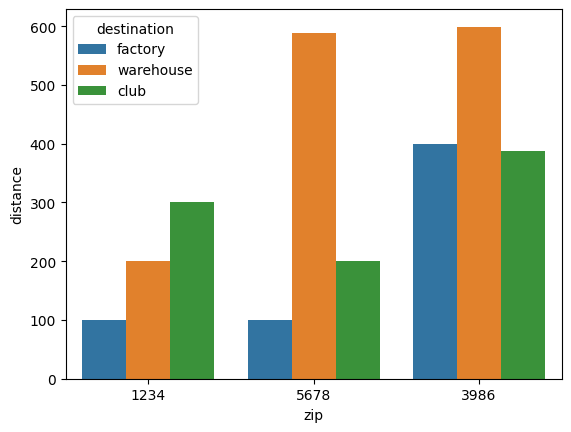

In [73]:
import seaborn as sns

sns.barplot(df, x='zip', y='distance', hue='destination')